In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("Train Dataset Overview:")
display(train.head())
print("\nDataset Info:")
train.info()
print("\nNumerical Summary:")
display(train.describe())



Train Dataset Overview:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB

Numerical Summary:


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


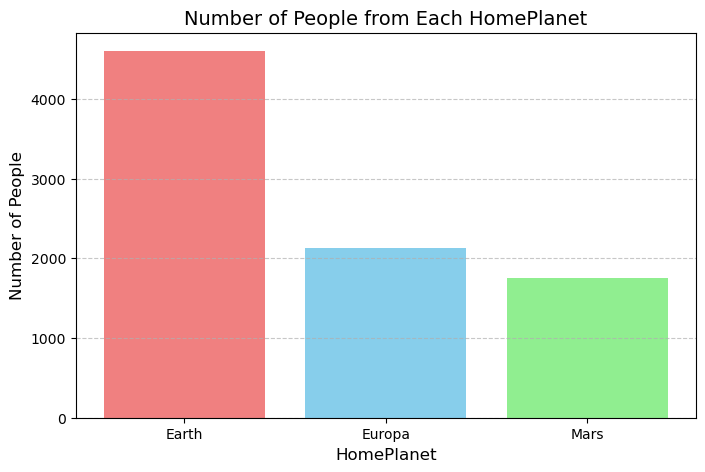

In [13]:
# Distribution of people from each HomePlanet
homeplanet_counts = train['HomePlanet'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(homeplanet_counts.index, homeplanet_counts.values, color=['lightcoral', 'skyblue', 'lightgreen'])
plt.xlabel('HomePlanet', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.title('Number of People from Each HomePlanet', fontsize=14)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


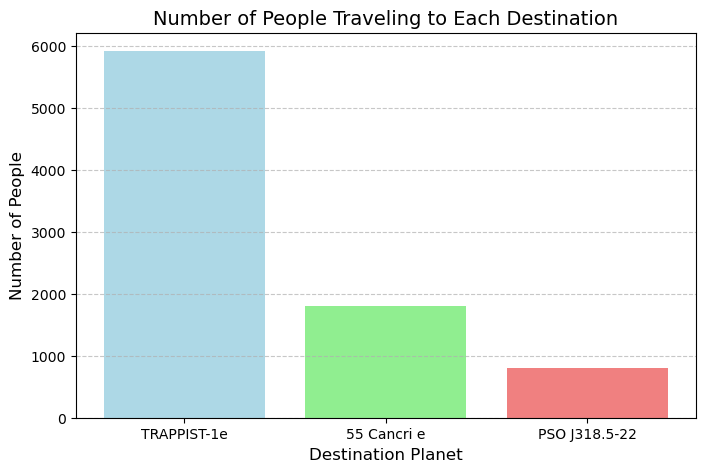

In [17]:
# Distribution of people traveling to each Destination
destination_counts = train['Destination'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(destination_counts.index, destination_counts.values, color=['lightblue', 'lightgreen', 'lightcoral'])
plt.xlabel('Destination Planet', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.title('Number of People Traveling to Each Destination', fontsize=14)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Figure size 1000x600 with 0 Axes>

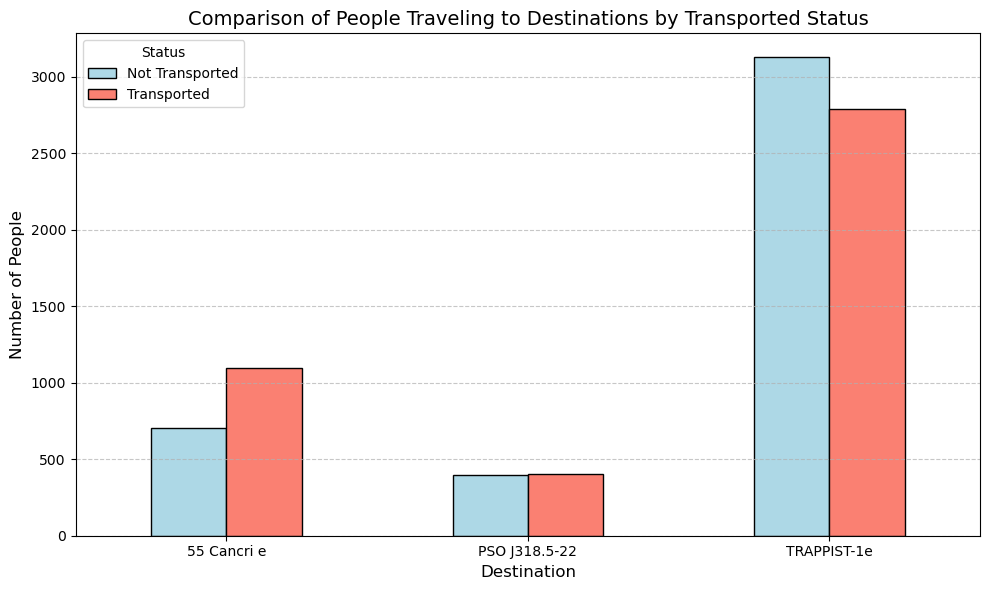

In [19]:
# Group data by Destination and Transported status
destination_transported = train.groupby(['Destination', 'Transported']).size().unstack()

plt.figure(figsize=(10, 6))
destination_transported.plot(kind='bar', stacked=False, color=['lightblue', 'salmon'], edgecolor='black', figsize=(10, 6))

# Customizing the chart
plt.title('Comparison of People Traveling to Destinations by Transported Status', fontsize=14)
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(['Not Transported', 'Transported'], title='Status', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


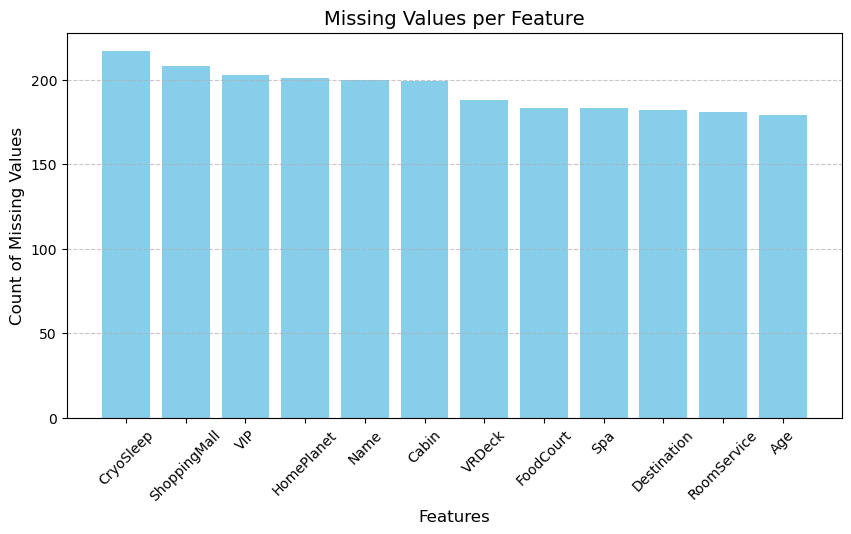

In [21]:
# Missing values analysis
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(missing_values.index, missing_values.values, color='skyblue')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Count of Missing Values', fontsize=12)
plt.title('Missing Values per Feature', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



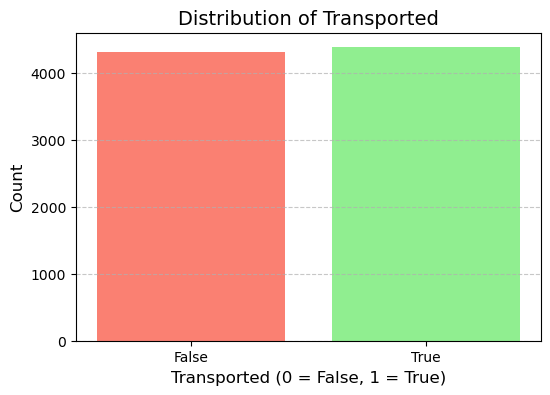

In [23]:
# Target variable distribution
target_counts = train['Transported'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(target_counts.index, target_counts.values, color=['lightgreen', 'salmon'])
plt.xlabel('Transported (0 = False, 1 = True)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Transported', fontsize=14)
plt.xticks([0, 1], ['False', 'True'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



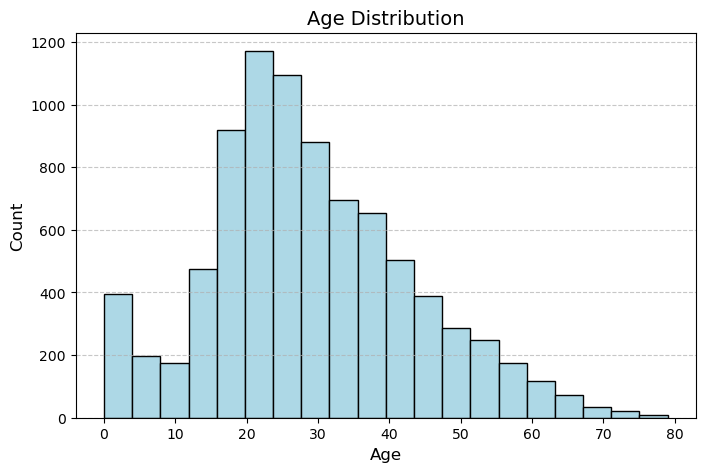

In [25]:
# Age distribution
plt.figure(figsize=(8, 5))
plt.hist(train['Age'].dropna(), bins=20, color='lightblue', edgecolor='black')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Age Distribution', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



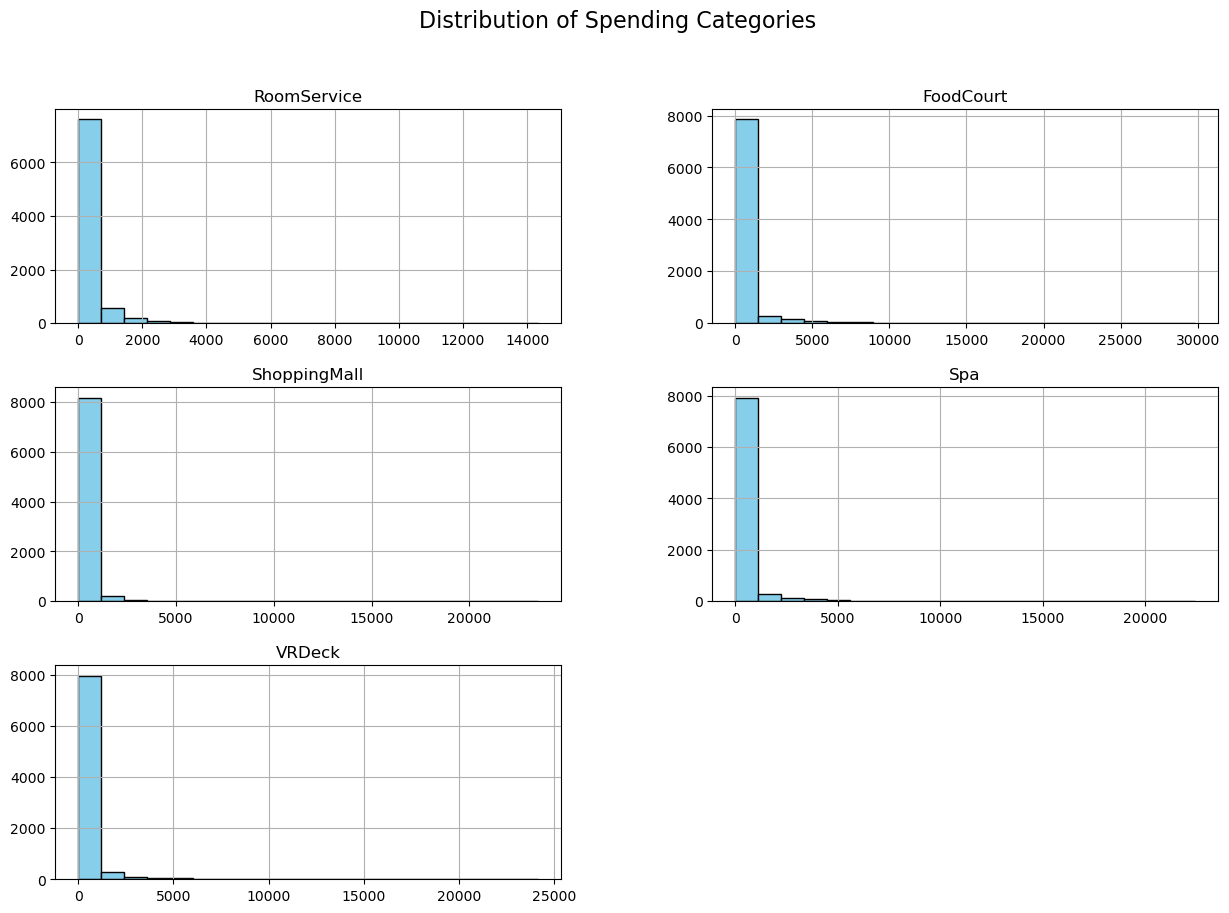

In [27]:
# Spending habits across different expense categories
expense_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train[expense_cols].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Spending Categories', fontsize=16)
plt.show()



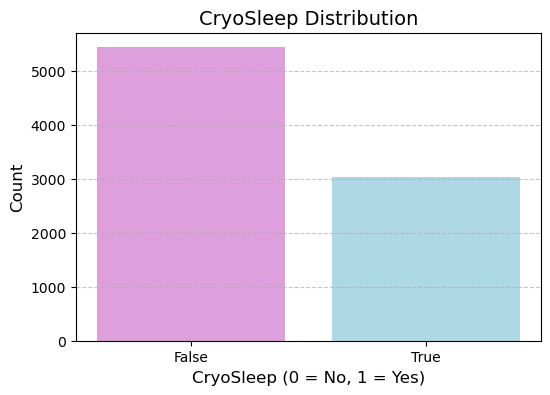

In [31]:
# CryoSleep distribution
cryosleep_counts = train['CryoSleep'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(cryosleep_counts.index.astype(str), cryosleep_counts.values, color=['plum', 'lightblue'])
plt.xlabel('CryoSleep (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('CryoSleep Distribution', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



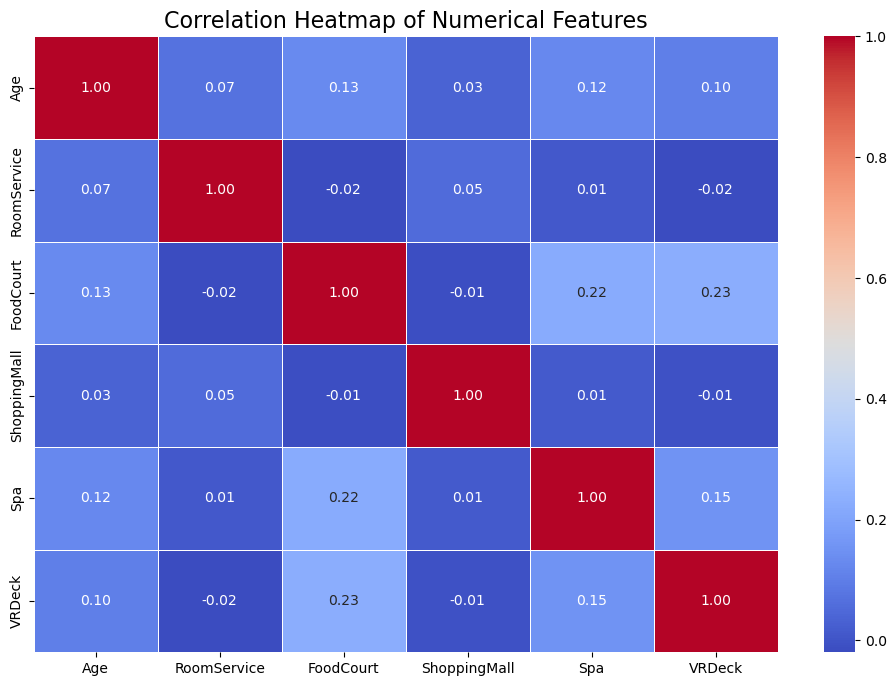

In [33]:
# Correlation heatmap (Seaborn)
plt.figure(figsize=(12, 8))
correlation_matrix = train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()



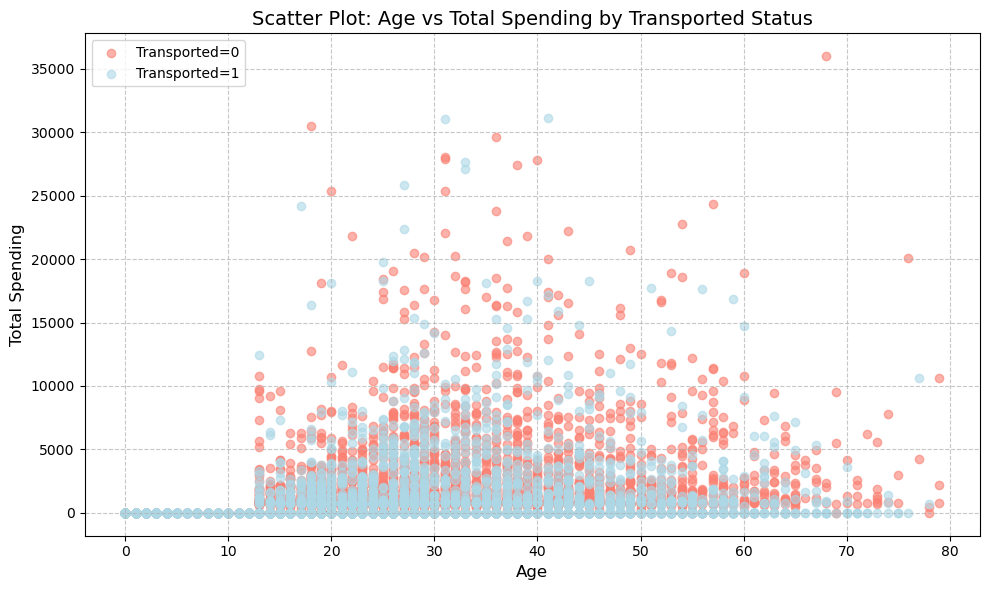

In [37]:
# Calculate total spending
train['TotalSpending'] = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

plt.figure(figsize=(10, 6))
for transported, color in zip([0, 1], ['salmon', 'lightblue']):
    subset = train[train['Transported'] == transported]
    plt.scatter(subset['Age'], subset['TotalSpending'], alpha=0.6, label=f'Transported={transported}', color=color)

# Customizing the scatter plot
plt.title('Scatter Plot: Age vs Total Spending by Transported Status', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.legend(fontsize=10)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\Anushaa\AppData\Local\Temp\ipykernel_25004\3285474957.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spending_by_age = train.groupby('AgeGroup')['TotalSpending'].mean()


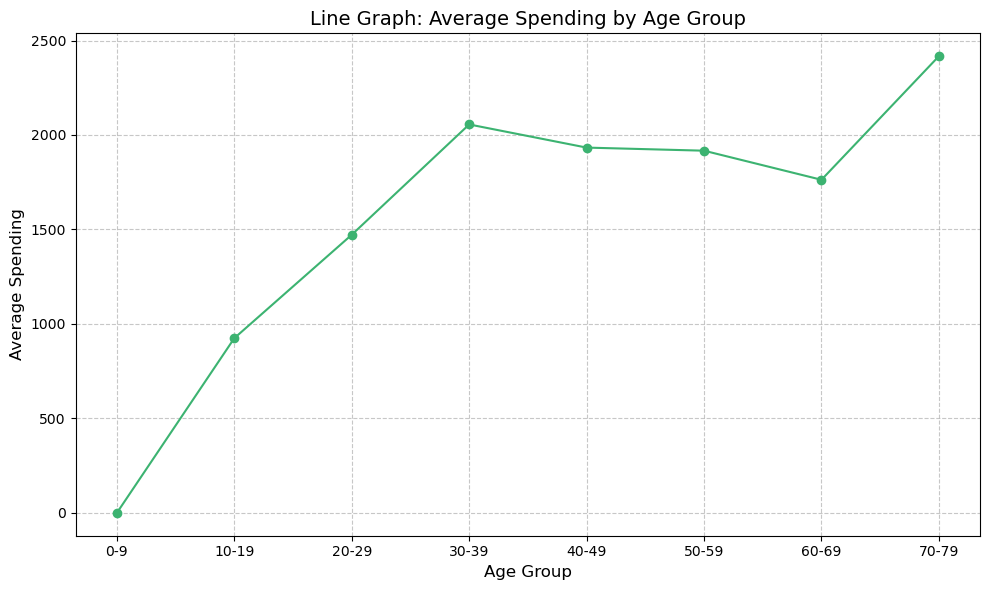

In [39]:
# Bin ages into groups and calculate average spending
train['AgeGroup'] = pd.cut(train['Age'], bins=range(0, 100, 10), labels=[f'{i}-{i+9}' for i in range(0, 90, 10)])
avg_spending_by_age = train.groupby('AgeGroup')['TotalSpending'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_spending_by_age.index.astype(str), avg_spending_by_age.values, marker='o', color='mediumseagreen', linestyle='-')

# Customizing the line graph
plt.title('Line Graph: Average Spending by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Spending', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

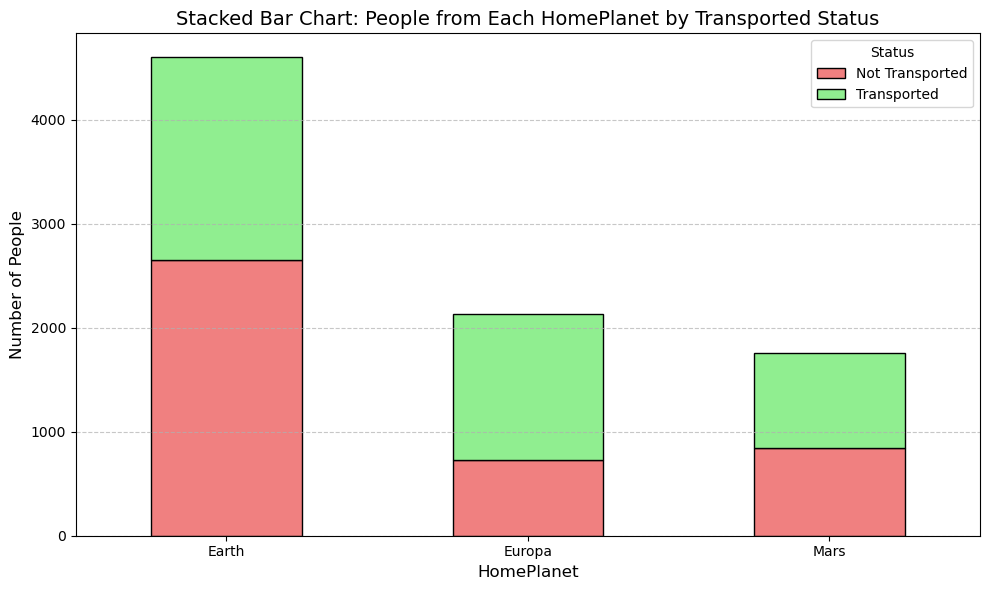

In [43]:
# Group data by HomePlanet and Transported status
homeplanet_transported = train.groupby(['HomePlanet', 'Transported']).size().unstack()

plt.figure(figsize=(10, 6))
homeplanet_transported.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'], edgecolor='black', figsize=(10, 6))

plt.title('Stacked Bar Chart: People from Each HomePlanet by Transported Status', fontsize=14)
plt.xlabel('HomePlanet', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(['Not Transported', 'Transported'], title='Status', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
